Model: "linear_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97 (388.00 B)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


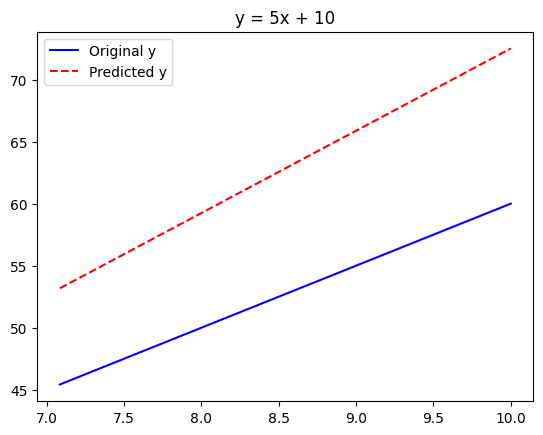

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Prepare dataset
x = np.linspace(-10, 10, 200)
y = 5*x + 10

# Split into train/val/test
train_size = int(0.7*len(x))
val_size = int(0.15*len(x))

x_train, y_train = x[:train_size], y[:train_size]
x_val, y_val = x[train_size:train_size+val_size], y[train_size:train_size+val_size]
x_test, y_test = x[train_size+val_size:], y[train_size+val_size:]

# Build model (Functional API)
inputs = Input(shape=(1,))
x1 = Dense(8, activation='relu')(inputs)
x2 = Dense(8, activation='relu')(x1)
outputs = Dense(1)(x2)

model = Model(inputs, outputs, name="linear_model")
model.compile(optimizer='adam', loss='mse')
model.summary()

# Train
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=200, verbose=0)

# Predict
y_pred = model.predict(x_test)

# Plot
plt.plot(x_test, y_test, 'b', label='Original y')
plt.plot(x_test, y_pred, 'r--', label='Predicted y')
plt.title("y = 5x + 10")
plt.legend()
plt.show()

Model: "quadratic_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


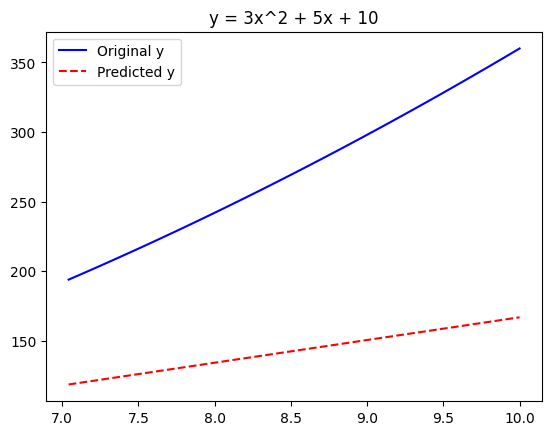

In [2]:
# Prepare dataset
x = np.linspace(-10, 10, 400)
y = 3*x**2 + 5*x + 10

# Split
train_size = int(0.7*len(x))
val_size = int(0.15*len(x))

x_train, y_train = x[:train_size], y[:train_size]
x_val, y_val = x[train_size:train_size+val_size], y[train_size:train_size+val_size]
x_test, y_test = x[train_size+val_size:], y[train_size+val_size:]

# Functional API model
inputs = Input(shape=(1,))
x1 = Dense(16, activation='relu')(inputs)
x2 = Dense(16, activation='relu')(x1)
outputs = Dense(1)(x2)

model = Model(inputs, outputs, name="quadratic_model")
model.compile(optimizer='adam', loss='mse')
model.summary()

# Train
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=300, verbose=0)

# Predict & Plot
y_pred = model.predict(x_test)
plt.plot(x_test, y_test, 'b', label='Original y')
plt.plot(x_test, y_pred, 'r--', label='Predicted y')
plt.title("y = 3x^2 + 5x + 10")
plt.legend()
plt.show()

Model: "cubic_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,665 (6.50 KB)

 Trainable params: 1,665 (6.50 KB)

 Non-trainable params: 0 (0.00 B)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/stepWARNING:tensorflow:5 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002E5F0213E20> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


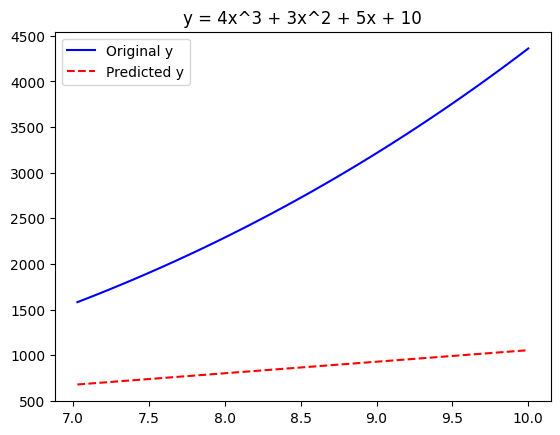

In [3]:
# Prepare dataset
x = np.linspace(-10, 10, 600)
y = 4*x**3 + 3*x**2 + 5*x + 10

# Split
train_size = int(0.7*len(x))
val_size = int(0.15*len(x))

x_train, y_train = x[:train_size], y[:train_size]
x_val, y_val = x[train_size:train_size+val_size], y[train_size:train_size+val_size]
x_test, y_test = x[train_size+val_size:], y[train_size+val_size:]

# Functional API model
inputs = Input(shape=(1,))
x1 = Dense(32, activation='relu')(inputs)
x2 = Dense(32, activation='relu')(x1)
x3 = Dense(16, activation='relu')(x2)
outputs = Dense(1)(x3)

model = Model(inputs, outputs, name="cubic_model")
model.compile(optimizer='adam', loss='mse')
model.summary()

# Train
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=400, verbose=0)

# Predict & Plot
y_pred = model.predict(x_test)
plt.plot(x_test, y_test, 'b', label='Original y')
plt.plot(x_test, y_pred, 'r--', label='Predicted y')
plt.title("y = 4x^3 + 3x^2 + 5x + 10")
plt.legend()
plt.show()